##Data Visualization Workshop
Co-Presented by Julia Barrow and Sneha Jaikumar



## Setup

First, let's set up R in the colab notebook

To run [R code in Google Colab](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497) run command:

```
%load_ext rpy2.ipython
```

Then, each chunk of code where we want to use R we need to include `%%R`

## Introduction

What does Data Visualization Consist of?
- Tableau?
- Python?
- R?

### Best Practices

Key is to "tell a story"

- Consider your audience
- Have a specific goal/purpose
- Simple is usually better
- Choose effective features and format

The possibilities are endless. Here are a few examples with...

##ggplot

In [ ]:
%%R
#this chunk is not going to run due to lack of data, but we can see the code used to produce the below visual
library(ggplot2)
ggplot(outputs_final,aes(Model, Result, color = Result)) +
  geom_jitter(alpha=0.5, size = 0.2) +
  scale_color_manual(values=c("firebrick4", "firebrick2", "aquamarine2","aquamarine4")) +
  scale_x_discrete(labels = c("Full Logistic\nModel","Full KNN Model","Logistic Numeric\nModel",
                              "KNN Numeric\nModel",
                              "KNN Numeric Model\nwithout Liveness","Logistic Model with\n2-Way Interaction",
                              "KNN Model with\n2-Way Interaction")) +
  guides(colour = guide_legend(override.aes = list(size=2.5))) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_text(face="bold"),
        title = element_text(face="bold"),
        legend.background = element_rect(color="gray")) +
  ggtitle("Classification Model Results")

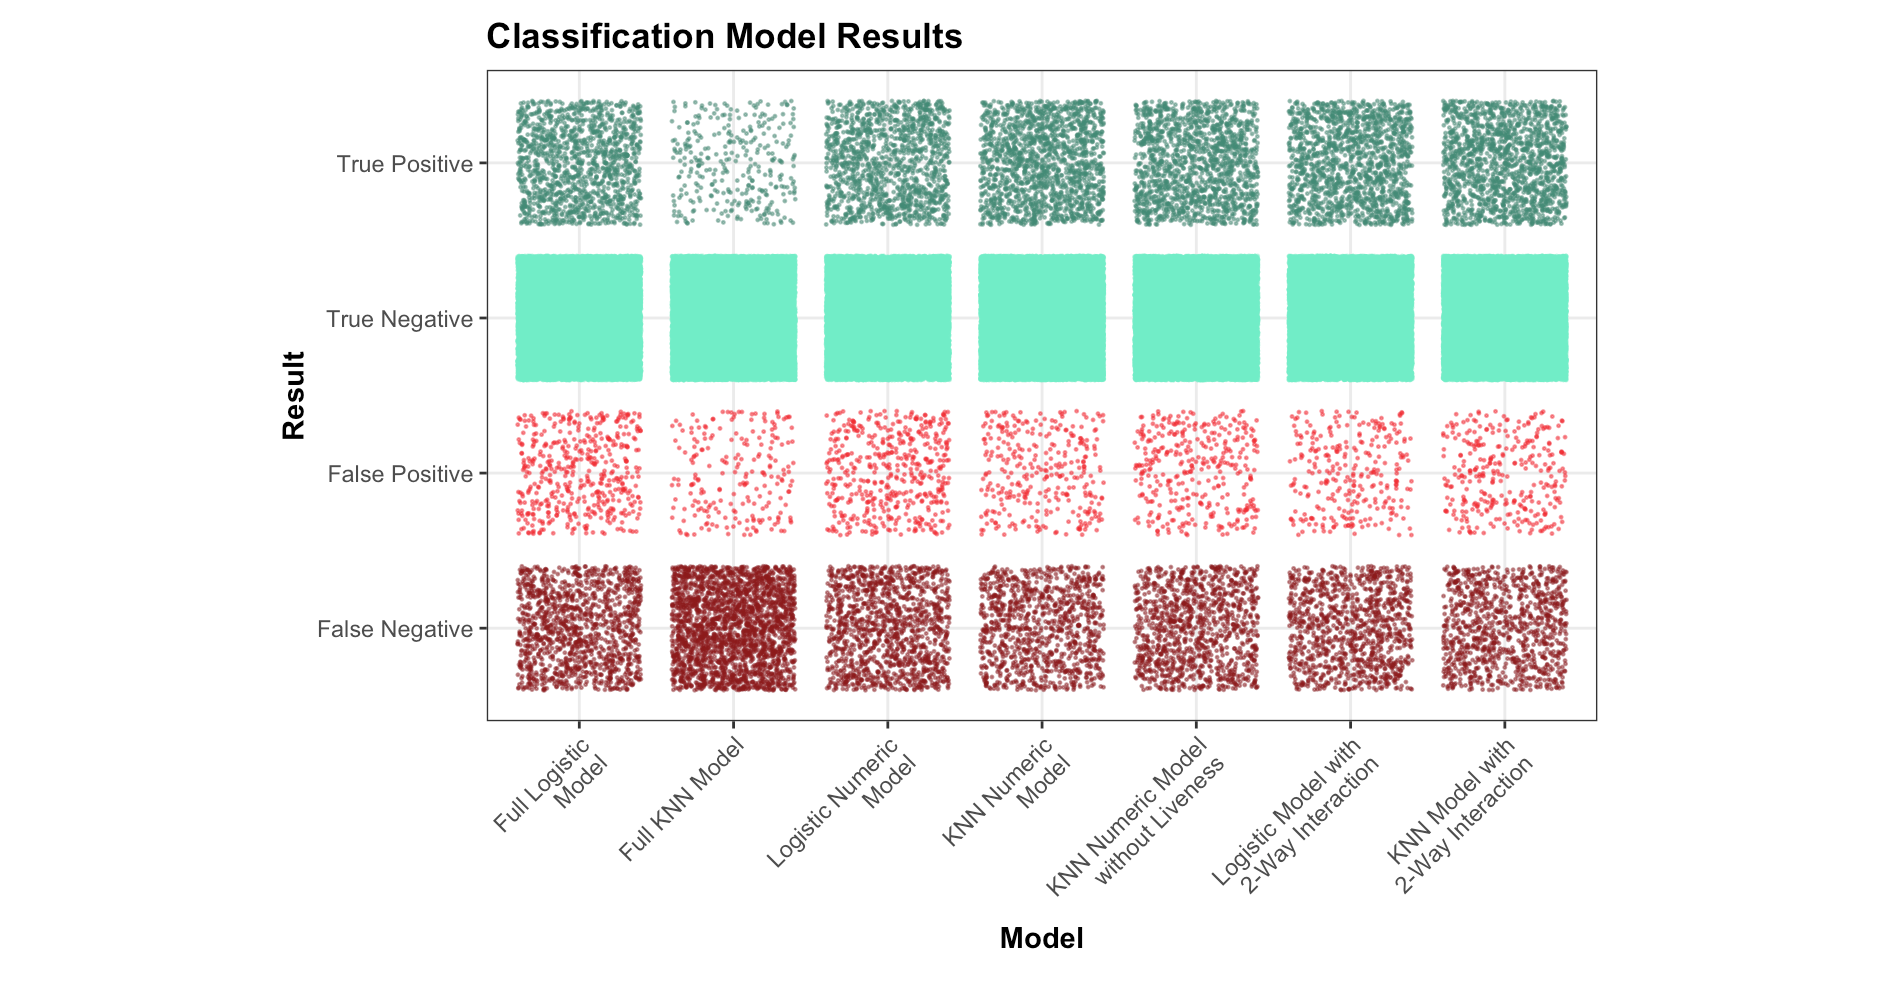

In [ ]:
%%R
#this chunk is not going to run due to lack of data, but we can see the code used to produce the below visual
data_w_preds <- read.csv("test_probs.csv")

rhh <- as.raster(readPNG("rhh.png"))
plate <- as.raster(readPNG("plate.png"))
whitespace <- as.raster(readPNG("whitespace.png"))

ggplot(data = data_w_preds, aes(x = plate_x, y = plate_z, z = ground_prob)) +
  xlim(-4.5, 4.5) +
  ylim(-1-2.35, 7-2.35) +
  xlab(element_blank()) +
  ylab(element_blank()) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_rect(aes(xmin = -0.8333, xmax = 0.8333, ymin = 1.5-2.35, ymax = 3.2-2.35), alpha = .1, color = "black", fill = "white", size = .2) +
  annotation_raster(rhh, -4, -1.6, -.5-2.35, 6-2.35) +
  annotation_raster(whitespace, -1.62, -1.59, -.5-2.35, 3.62-2.35) +
  annotation_raster(plate, -0.7083333-.01, 0.7083333+0.01, -0.3-2.35, 0.4-2.35)+
  theme(axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank()) +
  stat_summary_2d(geom = "tile", alpha = 0.4) + scale_fill_gradient2(name = "ground_prob", low = "#11a6fc", mid = "white", high = "#ff0061",
                                                                      midpoint = median(data_w_preds$ground_prob)) + ggtitle("Graph 8: Groundball Probability by Pitch Location")

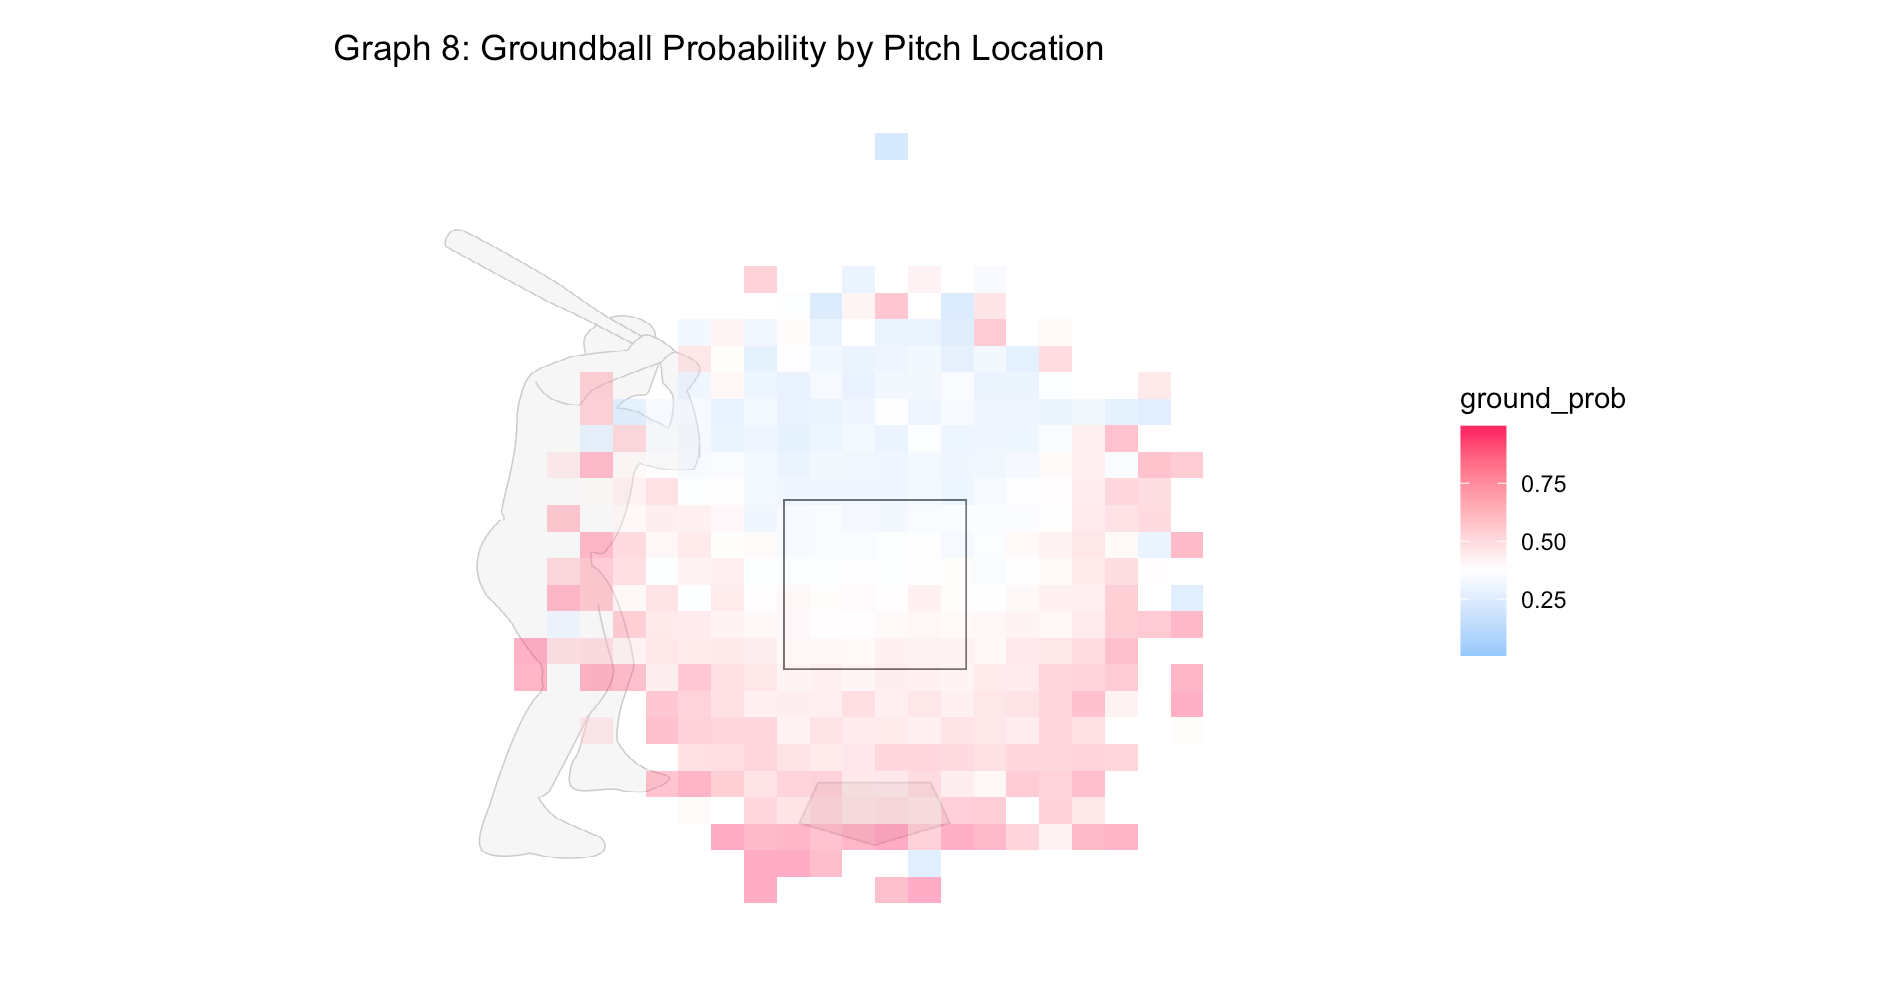

Credit: Sarah Wooster

##Shiny Apps

Shiny apps can be a cool way to make interactive visualization and allow others to access them easily without having your code. Shiny is now avaliable in both R and Python, so you can play around with it in whatever language you prefer!

Check out some examples:

[Shiny Gallery](https://shiny.posit.co/r/gallery/#user-showcase)

## Tableau

Tableau offers an easier user interface to make visualization and generally doesn't require coding.

[Simple Example](https://public.tableau.com/views/CDCMAp/Map?:language=en-US&:display_count=n&:origin=viz_share_link)



## Examples from Daily Tar Heel Data Desk

[NC State Fair](https://www.dailytarheel.com/article/2023/10/lifestyle-nc-state-fair-food-review-2023)

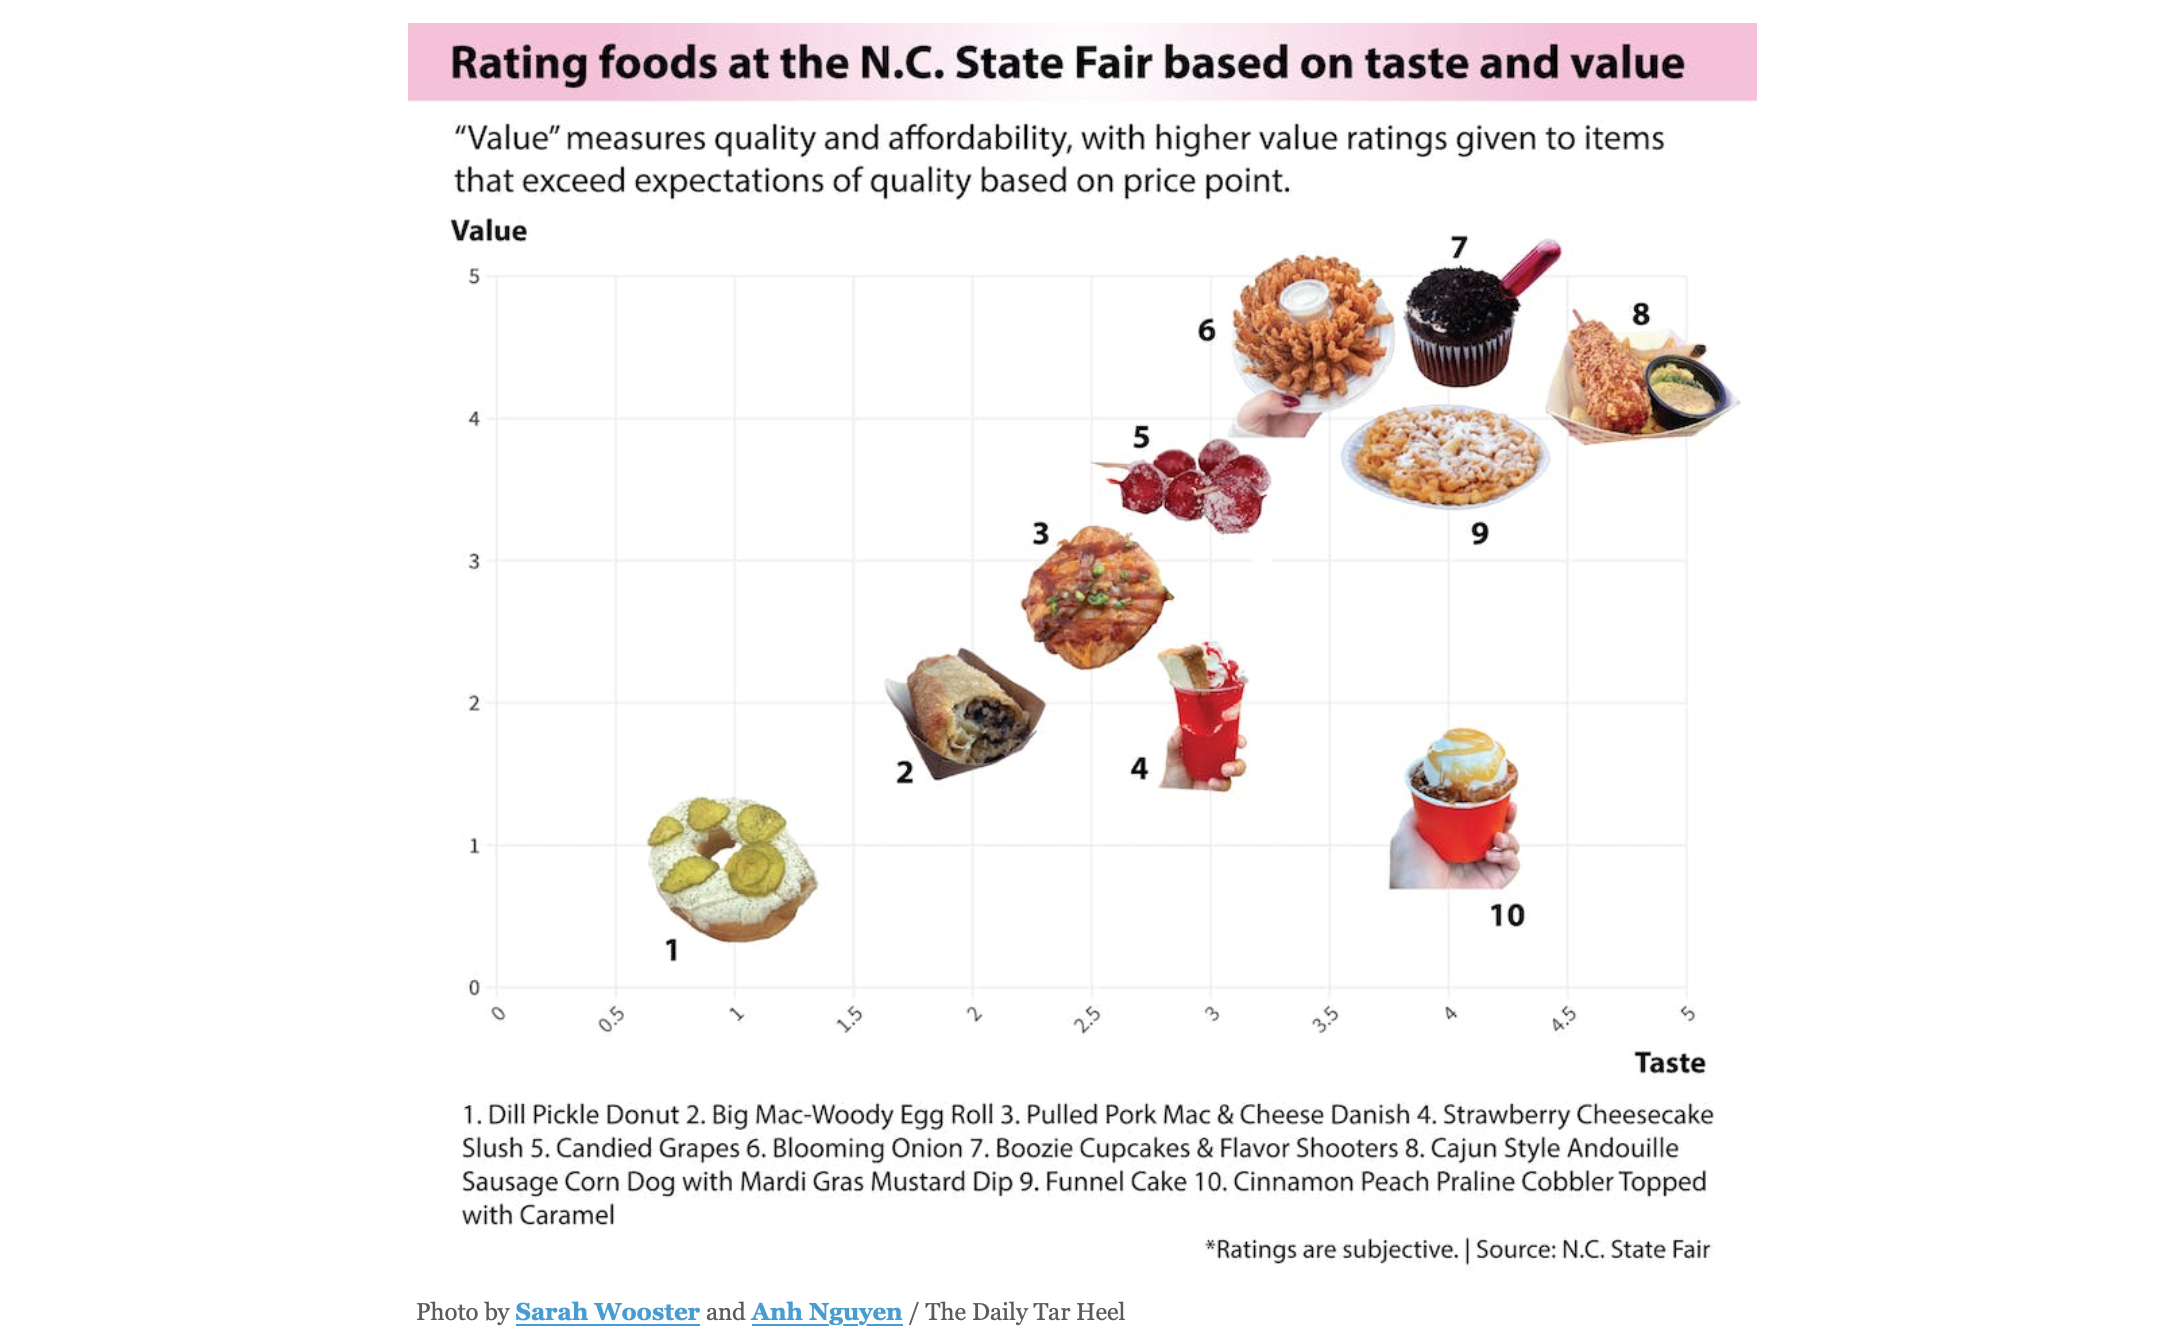

Other examples:

[Women's Baskbetball Attendance](https://www.dailytarheel.com/article/2023/11/north-carolina-womens-basketball-carmichael-arena-attendance-spike-2023-hoops-preview)

[Student Fees](https://www.dailytarheel.com/article/2023/02/university-fee-explainer-connect-carolina)



---



##Python Libraries for Data Visualization
- Matplotlib
- Pyplot
- Seaborn
- Ggplot

## The possibilities are endless!

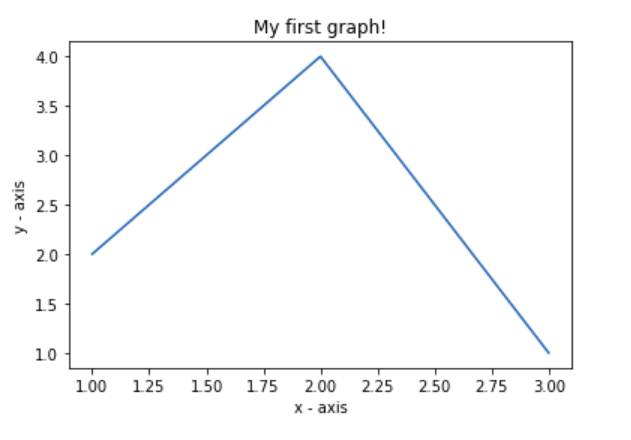

## Animated Plots!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation,PillowWriter
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##What will we be looking at?
Our dataset shows the population of males and females in Canada over the years and categorized into age groups. You can access the CSV [here](https://drive.google.com/file/d/1ShOKLYsCFCEU8dRp0h7TqxDD69aHPM_z/view?usp=sharing)

In [ ]:
#Load in CSV
df = pd.read_csv('/content/drive/MyDrive/ages.csv')

In [ ]:
#Fill in empty values for 'Age Group' column
df['Age Group'] = df['Age Group'].fillna(method = 'ffill')

In [ ]:
#Reformat and Type cast values
df['Males'] = df['Males'].str.replace(",","").astype('int')
df['Females'] = df['Females'].str.replace(",","").astype('int')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age Group  918 non-null    object
 1   Year       918 non-null    int64 
 2   Males      918 non-null    int64 
 3   Females    918 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 28.8+ KB
None


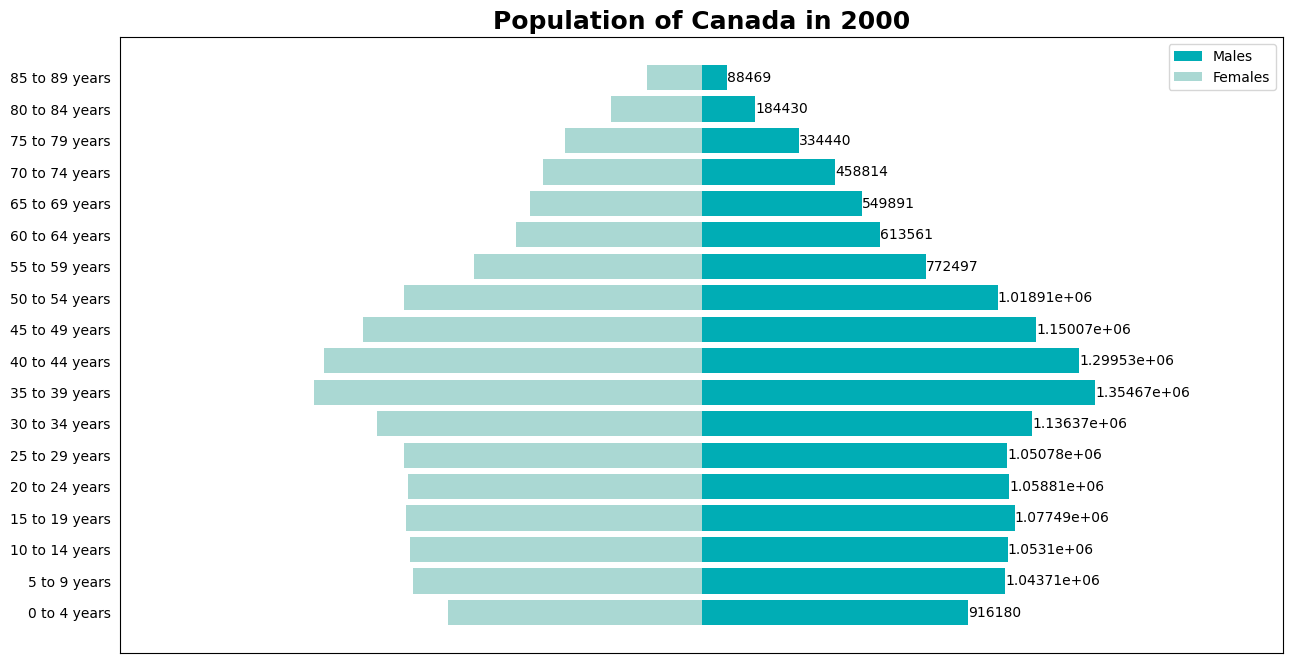

In [ ]:
#Create our plot!
fig,ax = plt.subplots(figsize=(15,8))

#def animate(year):
ax.clear()
filtered = df[df['Year']==2000]
#Generate the plot for males and females
males = plt.barh(y=filtered['Age Group'], width = filtered['Males'], color = '#00ADB5')
females = plt.barh(y=filtered['Age Group'], width = filtered['Females'], color = '#AAD8D3')
ax.set_xlim(-2_000_000,2_000_000)
ax.bar_label(males)
#comment out initially
# ax.bar_label(males, padding = 3, labels = [f'{round(value, -3):,}' for value in filtered['Males']])
# ax.bar_label(females, padding = 3, labels = [f'{-1*round(value, -3):,}' for value in filtered['Females']])
# for edge in ['top', 'right','bottom','left']:
#   ax.spines[edge].set_visible(False)
ax.tick_params(left = False)
ax.get_xaxis().set_visible(False)

ax.legend([males,females],['Males','Females'])

ax.set_title(f'Population of Canada in 2000', size = 18, weight = 'bold')
plt.show()


# anim = FuncAnimation(fig,animate, frames = range(df['Year'].min(),df['Year'].max() + 1))
# f = r"/content/drive/MyDrive/animation.gif"
# writergif = PillowWriter(fps=10)
# anim.save(f, writer=writergif)
#plt.savefig('testplot.mp4')

In [ ]:
#TO-DO
# df['Females'] = df['Females'] * -1
# df.head(10)

,Age Group,Year,Males,Females
0,0 to 4 years,1971,938835,-897314
1,0 to 4 years,1972,921965,-879950
2,0 to 4 years,1973,916686,-871480
3,0 to 4 years,1974,911727,-865968
4,0 to 4 years,1975,908801,-862260
5,0 to 4 years,1976,902201,-857116
6,0 to 4 years,1977,902405,-858401
7,0 to 4 years,1978,905661,-861724
8,0 to 4 years,1979,913235,-867487
9,0 to 4 years,1980,919129,-872638


In [ ]:
#Get information for just the year 2000
filtered = df[df['Year']==2000]
filtered.head(10)

,Age Group,Year,Males,Females
29,0 to 4 years,2000,916180,-874519
80,5 to 9 years,2000,1043712,-993237
131,10 to 14 years,2000,1053098,-1002745
182,15 to 19 years,2000,1077494,-1018415
233,20 to 24 years,2000,1058812,-1009565
284,25 to 29 years,2000,1050780,-1023432
335,30 to 34 years,2000,1136367,-1117071
386,35 to 39 years,2000,1354673,-1334113
437,40 to 44 years,2000,1299531,-1301404
488,45 to 49 years,2000,1150069,-1165359


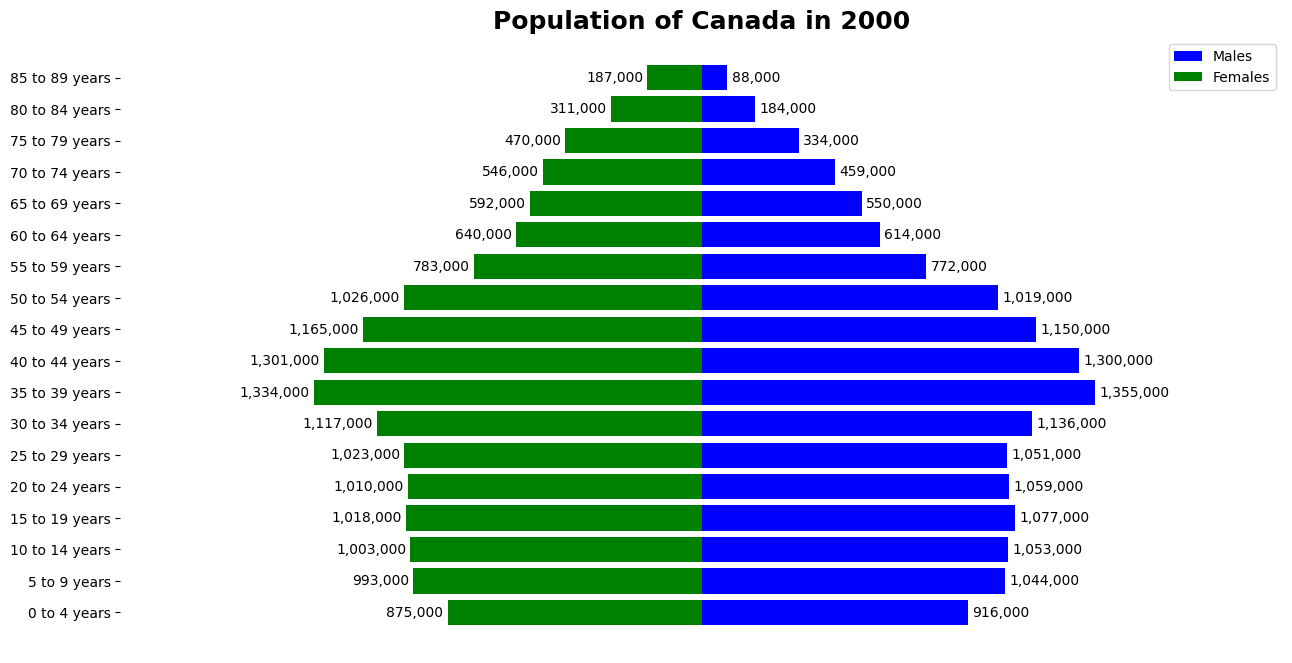

In [ ]:
#Make plot
fig,ax = plt.subplots(figsize=(15,8))
ax.clear()
#Make separate plots for males and females
#males = plt.barh(y=filtered['____'], width = filtered['____'], color = '___')
#females = plt.barh(y=filtered['____'], width = filtered['____'], color = '___')

males = plt.barh(y=filtered['Age Group'], width = filtered['Males'], color = 'blue')
females = plt.barh(y=filtered['Age Group'], width = filtered['Females'], color = 'green')

#We want to have a legend for each color
ax.legend([males,females],['Males','Females'])

#We want to have a title
ax.set_title(f'Population of Canada in 2000', size = 18, weight = 'bold')

###########
#We want to show the population next to each group
# ax.bar_label(males)
# ax.bar_label(females)
#Remove x axis
ax.get_xaxis().set_visible(False)
#change color
#'#00ADB5'
#'#AAD8D3
#Set a limit for the x-acis
ax.set_xlim(-2_000_000,2_000_000)
#fix the axis
#make the bar labels better
ax.bar_label(males, padding = 3, labels = [f'{round(value, -3):,}' for value in filtered['Males']])
ax.bar_label(females, padding = 3, labels = [f'{-1*round(value, -3):,}' for value in filtered['Females']])
for edge in ['top', 'right','bottom','left']:
  ax.spines[edge].set_visible(False)

plt.show()

#Does this look right?

In [ ]:
#Make plot
fig,ax = plt.subplots(figsize=(15,8))
ax.clear()
#Make separate plots for males and females
#males = plt.barh(y=filtered['____'], width = filtered['____'], color = '___')
#females = plt.barh(y=filtered['____'], width = filtered['____'], color = '___')
def animate(year):
  ax.clear()
  #add this aftr
  filtered = df[df['Year']==year]
  males = plt.barh(y=filtered['Age Group'], width = filtered['Males'], color = 'blue')
  females = plt.barh(y=filtered['Age Group'], width = filtered['Females'], color = 'green')

  #We want to have a legend for each color
  ax.legend([males,females],['Males','Females'])

  #We want to have a title
  ax.set_title(f'Population of Canada in {year}', size = 18, weight = 'bold')

  ###########
  #We want to show the population next to each group
  # ax.bar_label(males)
  # ax.bar_label(females)
  #Remove x axis
  ax.get_xaxis().set_visible(False)
  #change color
  #'#00ADB5'
  #'#AAD8D3
  #Set a limit for the x-acis
  ax.set_xlim(-2_000_000,2_000_000)
  #fix the axis
  #make the bar labels better
  ax.bar_label(males, padding = 3, labels = [f'{round(value, -3):,}' for value in filtered['Males']])
  ax.bar_label(females, padding = 3, labels = [f'{-1*round(value, -3):,}' for value in filtered['Females']])
  for edge in ['top', 'right','bottom','left']:
    ax.spines[edge].set_visible(False)

plt.show()

In [ ]:
# anim = FuncAnimation(fig,animate, frames = range(df['Year'].min(),df['Year'].max() + 1))
# f = r"/content/drive/MyDrive/animation.gif"
# writergif = PillowWriter(fps=10)
# anim.save(f, writer=writergif)
#plt.savefig('testplot.mp4')

Thanks for coming!